<a href="https://colab.research.google.com/github/BhagyaSri-1806/DataAnalyst/blob/main/PoliceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [ ]:
# prompt:  clean the data

import pandas as pd
# Convert the date column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%y', errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['date'], inplace=True)

# Fill missing values in the 'age' column with the mean age
data['age'].fillna(data['age'].mean(), inplace=True)

# Convert the 'age' column to integers
data['age'] = data['age'].astype(int)

# Remove rows where 'armed' is 'unknown'
data = data[data['armed'] != 'unknown']

print(data.head())


   id                name       date   manner_of_death       armed  age  \
0   3          Tim Elliot 2015-01-02              shot         gun   53   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun   47   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed   23   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon   32   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun   39   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

<ipython-input-6-5cfe2fb81c61>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [ ]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,36,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28,M,B,Oshkosh,WI,False,attack,Car,True


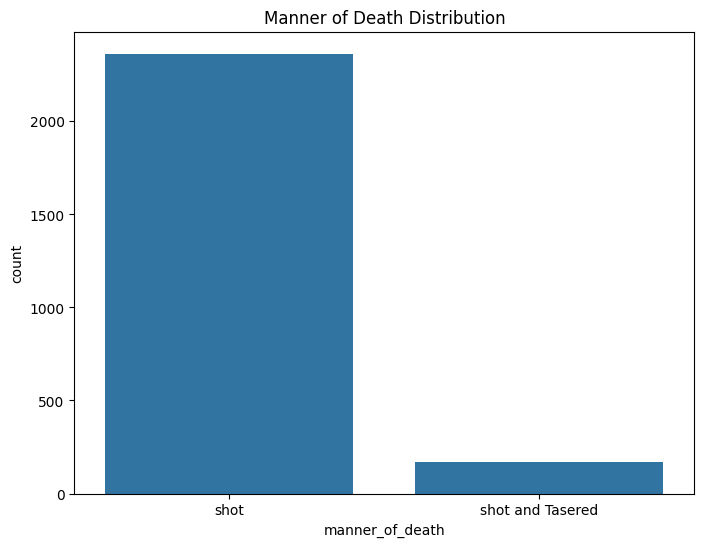

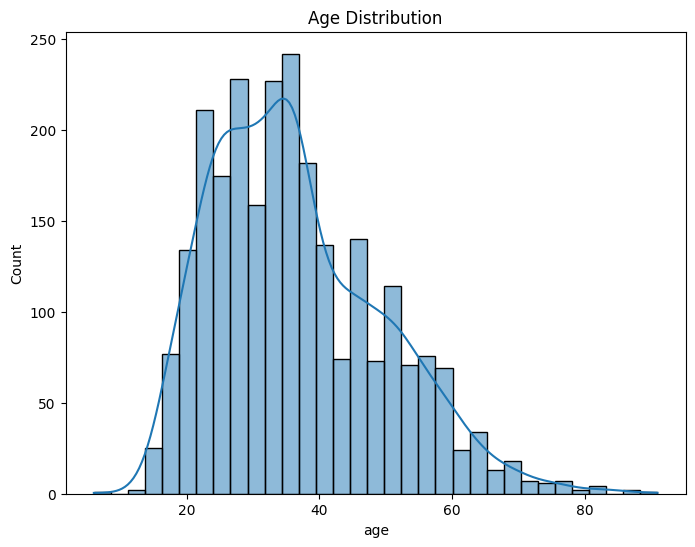

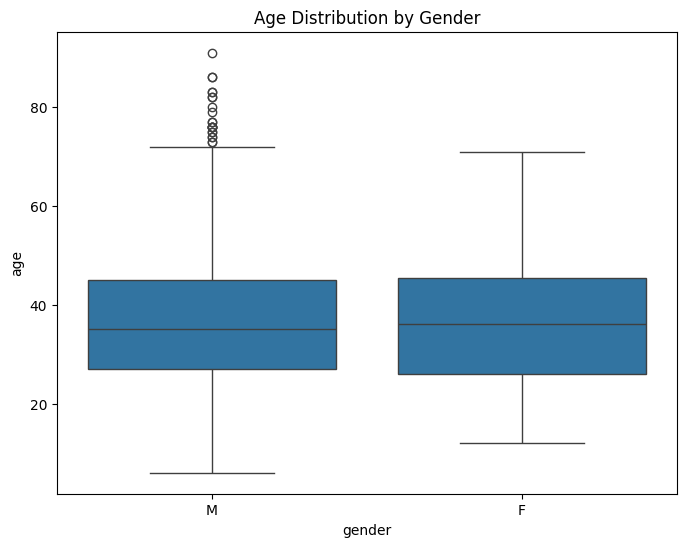

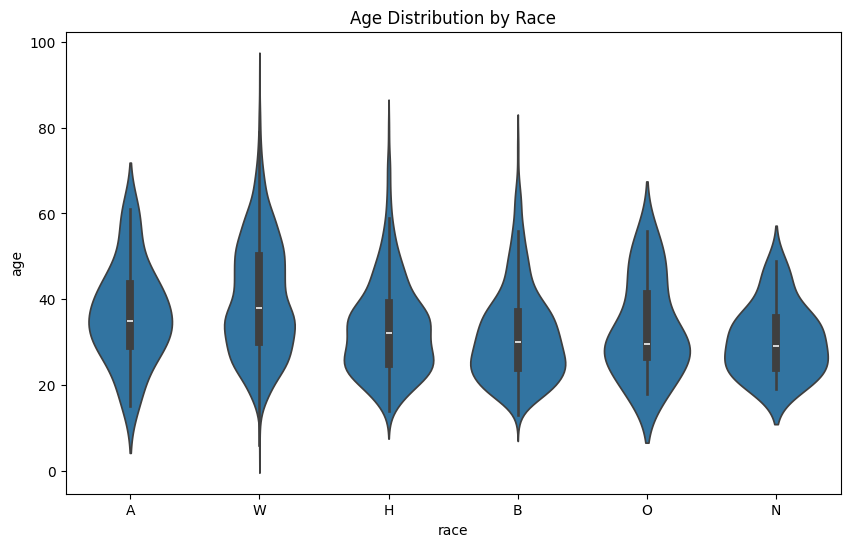

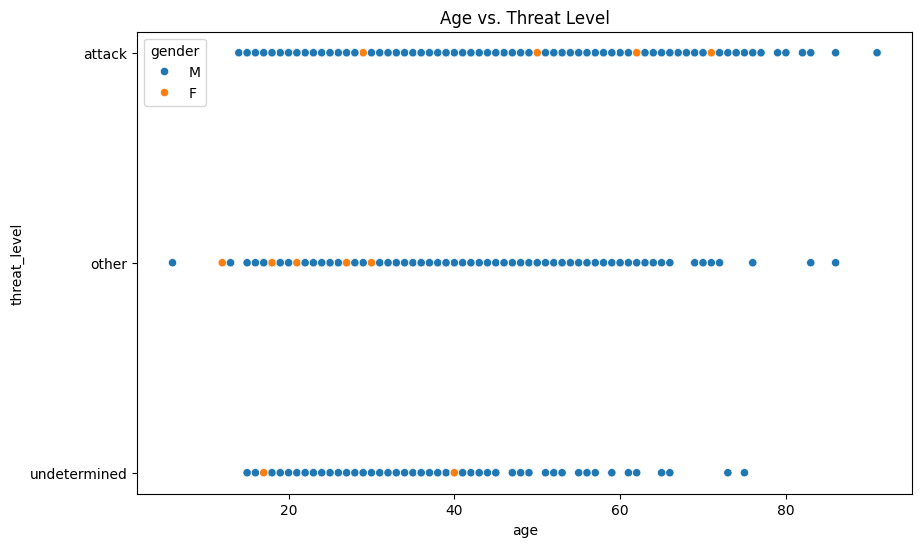

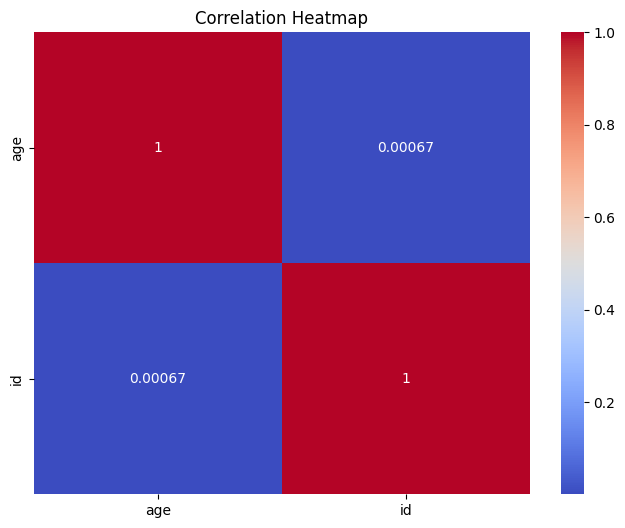

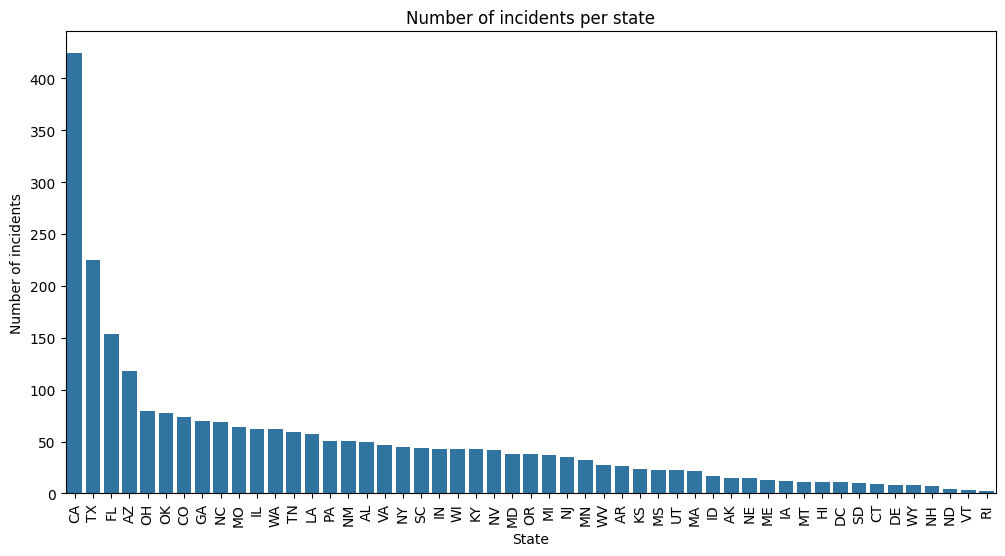

In [ ]:
# prompt:  7 different graphs using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Countplot of Manner of Death
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=data)
plt.title('Manner of Death Distribution')
plt.show()


# 2. Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(x='age', data=data, kde=True)
plt.title('Age Distribution')
plt.show()

# 3. Boxplot of Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Age Distribution by Gender')
plt.show()

# 4. Violinplot of Age by Race
plt.figure(figsize=(10, 6))
sns.violinplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race')
plt.show()

# 5. Scatterplot of Age vs. Threat Level
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='threat_level', hue='gender', data=data)
plt.title('Age vs. Threat Level')
plt.show()


# 6. Heatmap of correlation between numerical features
numerical_features = ['age', 'id']
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 7. Barplot showing the number of incidents per state
plt.figure(figsize=(12,6))
state_counts = data['state'].value_counts().sort_values(ascending=False)
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of incidents')
plt.title('Number of incidents per state')
plt.show()


<ipython-input-9-cfaebd9a5ecf>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


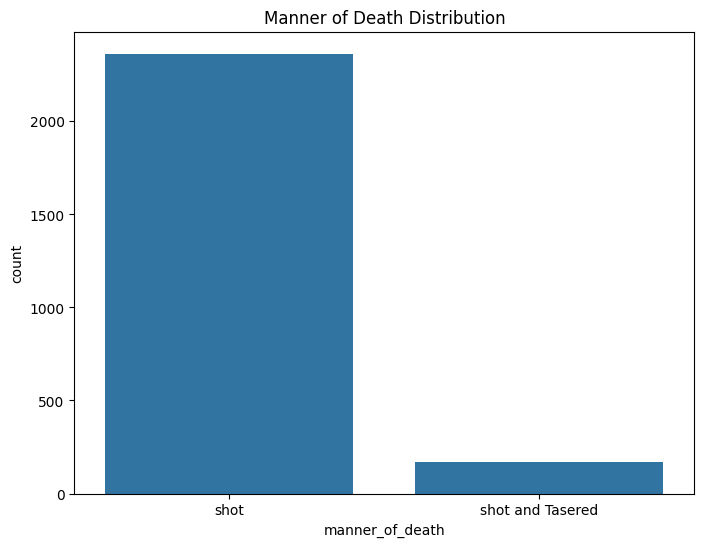

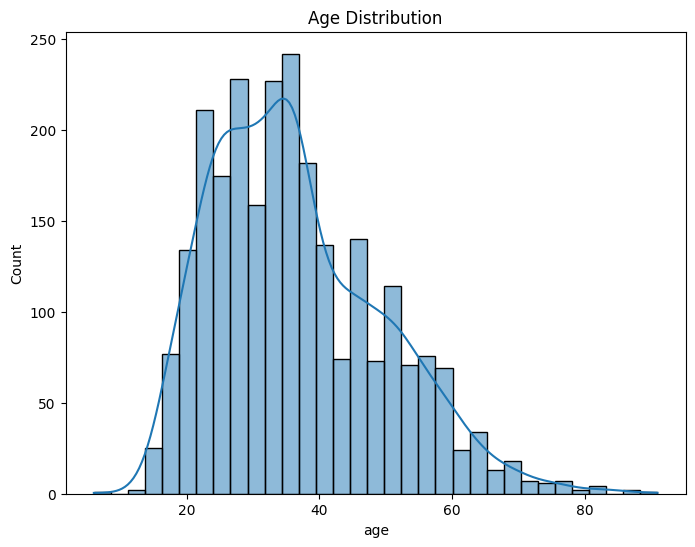

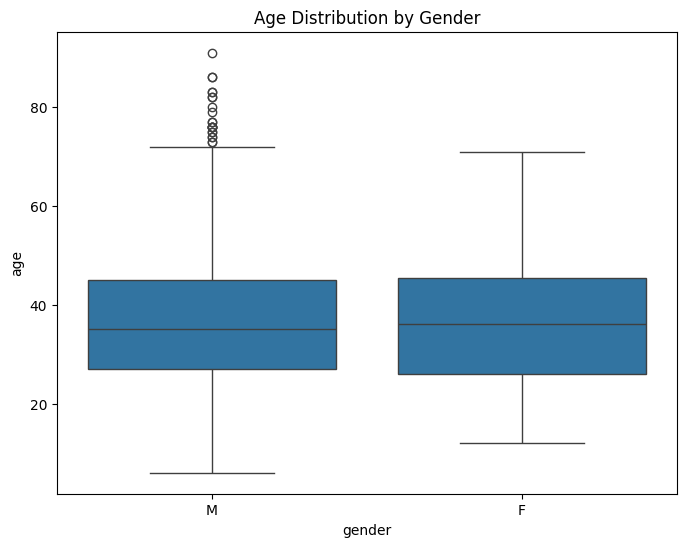

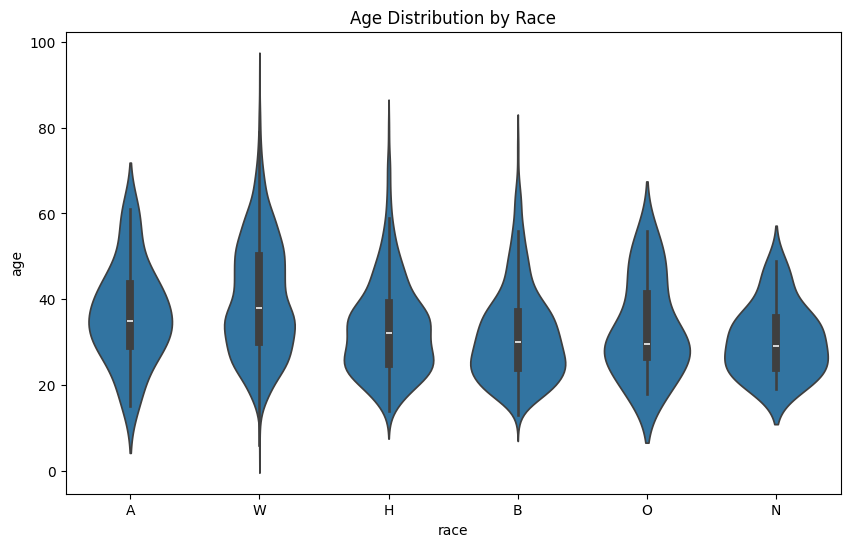

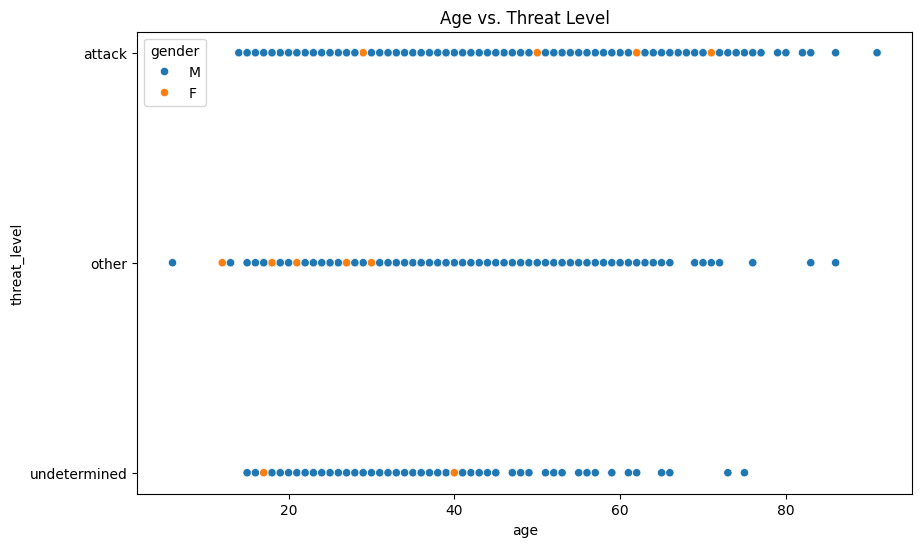

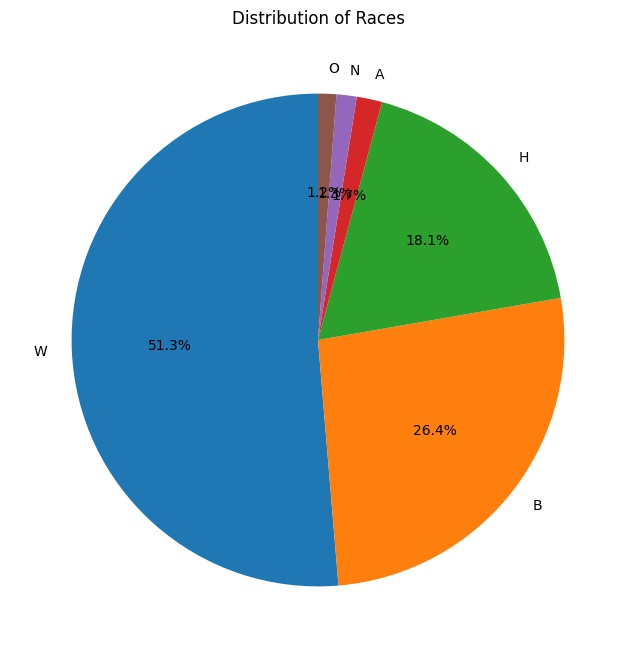

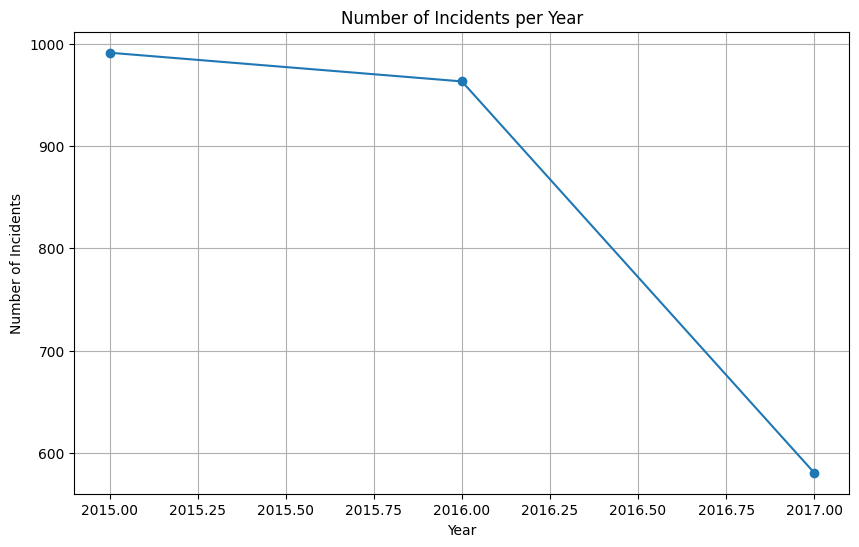

In [ ]:
# prompt: 7 different graphs using matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the CSV file is in the current directory or provide the correct path
data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')

# Data preprocessing (you can modify or extend this based on your needs)
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%y', errors='coerce')
data.dropna(subset=['date'], inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)
data['age'] = data['age'].astype(int)
data = data[data['armed'] != 'unknown']


# 1. Countplot of Manner of Death
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=data)
plt.title('Manner of Death Distribution')
plt.show()

# 2. Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(x='age', data=data, kde=True)
plt.title('Age Distribution')
plt.show()

# 3. Boxplot of Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Age Distribution by Gender')
plt.show()

# 4. Violinplot of Age by Race
plt.figure(figsize=(10, 6))
sns.violinplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race')
plt.show()

# 5. Scatterplot of Age vs. Threat Level
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='threat_level', hue='gender', data=data)
plt.title('Age vs. Threat Level')
plt.show()

# 6.  Pie chart of the most frequent races
race_counts = data['race'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Races')
plt.show()


# 7.  Line plot showing the number of incidents per year
data['year'] = data['date'].dt.year
incidents_per_year = data.groupby('year').size()
plt.figure(figsize=(10, 6))
plt.plot(incidents_per_year.index, incidents_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Year')
plt.grid(True)
plt.show()

In [ ]:
# prompt: dependancy for city and state

# Assuming you want to analyze the relationship between city and state
# Group data by state and city to see the number of incidents
city_state_counts = data.groupby(['state', 'city'])['id'].count().reset_index()
print(city_state_counts)

# You can further analyze this data, for example:
# Find the cities with the most incidents in each state
# Find the states with the most incidents overall

# Example: Find the city with the most incidents in each state
max_incidents_by_state = city_state_counts.loc[city_state_counts.groupby('state')['id'].idxmax()]
max_incidents_by_state

     state       city  id
0       AK  Anchorage   3
1       AK     Barrow   1
2       AK   Big Lake   1
3       AK  Fairbanks   5
4       AK    Houston   1
...    ...        ...  ..
1529    WY   Cheyenne   1
1530    WY    Douglas   2
1531    WY   Gillette   1
1532    WY    Laramie   1
1533    WY    Rawlins   1

[1534 rows x 3 columns]


,state,city,id
3,AK,Fairbanks,5
24,AL,Huntsville,4
58,AR,Little Rock,4
94,AZ,Phoenix,31
218,CA,Los Angeles,39
341,CO,Denver,11
364,CT,Bolton,1
373,DC,Washington,11
379,DE,Wilmington,3
426,FL,Miami,17


In [ ]:
# prompt: explanation for the above

This code analyzes data from a CSV file named "PoliceKillingsUS.csv" using the pandas, numpy, seaborn, and matplotlib libraries in Python. Let's break down the code section by section:

**1. Data Loading and Preprocessing:**

* **Import Libraries:** Imports necessary libraries for data manipulation, numerical operations, visualization, and plotting.
* **Load Data:** Reads the CSV file into a pandas DataFrame.  The `encoding='latin-1'` argument is crucial because the data likely contains characters outside the standard UTF-8 encoding.
* **Date Conversion:** Converts the 'date' column to datetime objects for proper time series analysis.  `errors='coerce'` handles invalid date formats by converting them to `NaT` (Not a Time).
* **Handle Missing Dates:** Drops rows where the date conversion failed (resulting in `NaT`).
* **Fill Missing Ages:** Fills missing age values with the mean age of the dataset. This is a common imputation method, but alternatives (like median or more sophisticated methods) might be considered depending on the data distribution.
* **Age Conversion:** Converts the 'age' column to integers.
* **Remove Unknown Armed Status:** Removes rows where the 'armed' column has the value 'unknown', as this category might skew analysis.

**2. Data Visualization:**

The code then creates several visualizations to explore patterns in the data:

* **Countplot of Manner of Death:** Shows the frequency of each manner of death.
* **Histogram of Age:** Visualizes the distribution of ages.
* **Boxplot of Age by Gender:** Compares age distributions between genders.
* **Violinplot of Age by Race:** Compares age distributions across different races, showing the distribution density.
* **Scatterplot of Age vs. Threat Level (by Gender):**  Shows the relationship between age and threat level, with points colored by gender.
* **Heatmap of Correlation:** Displays the correlation matrix between specified numerical features ('age' and 'id' in this case).  The correlation matrix shows how strongly two numerical variables are related.
* **Barplot of Incidents per State:** Visualizes the number of incidents in each state.
* **Pie Chart of Race Distribution:** Shows the proportion of each race in the dataset.
* **Line Plot of Incidents per Year:** Illustrates the trend in the number of incidents over the years.
* **City/State Incident Analysis:** Groups the data by state and city to count incidents in each location and displays the results. It also demonstrates how to find the city with the most incidents in each state.

**Potential Improvements:**

* **More Robust Missing Value Handling:**  Instead of simply filling missing ages with the mean, explore other imputation methods (median, k-NN, etc.) or consider the implications of missing data.
* **More Sophisticated Visualizations:** Explore additional plot types to uncover more insights.  Consider interactive plots for larger datasets.
* **Statistical Tests:** Instead of only visualizing data, apply statistical tests (e.g., t-tests, ANOVA) to confirm or refute potential hypotheses.
* **Feature Engineering:** Create new features from existing ones that might be more informative (e.g., age groups, time of day).
* **Outlier Detection and Handling:** Identify and address any outliers that might skew results.  Consider removing them or transforming the data.
* **Correlation Analysis Refinement:** Include more relevant numerical features in the correlation heatmap for better analysis.
* **Documentation:**  Add more detailed comments to explain the purpose of each section and the interpretation of the visualizations.  Explain the choices made during preprocessing.


This enhanced explanation should provide a more thorough understanding of the code's functionality and potential areas for improvement.


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-27-5c38b3547936>, line 3)

age_group  0-17  18-29  30-49  50+
gender                            
F             6     31     49   21
M            45    771   1185  427


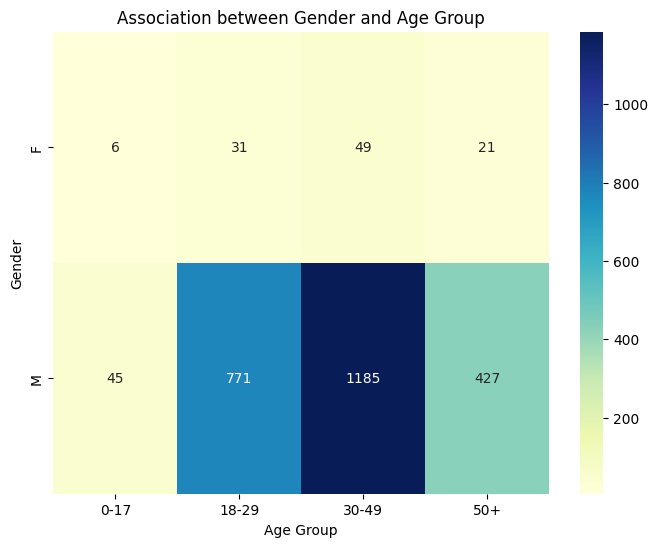


Mean age by gender:


,age
gender,
F,36.551402
M,36.588550


In [ ]:
# prompt:   data association for gender age

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'data'

# Create a cross-tabulation of gender and age groups
# First, define age groups (you can adjust these bins as needed)
age_bins = [0, 18, 30, 50, 100]  # Example bins: 0-17, 18-29, 30-49, 50+
age_labels = ['0-17', '18-29', '30-49', '50+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Create the cross-tabulation
gender_age_counts = pd.crosstab(data['gender'], data['age_group'])

# Display the cross-tabulation
print(gender_age_counts)

# Visualize the association using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gender_age_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Association between Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.show()

mean_age_by_gender = data.groupby('gender')['age'].mean()

print("\nMean age by gender:")
mean_age_by_gender


In [ ]:
# prompt:  explanation for the above

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset.  The provided code already does this.
# The following lines are for demonstration/explanation purposes only:
# data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')
# data.head(10)  # Display the first 10 rows to understand the structure


# Data Preprocessing:
# 1. Date Conversion: Converts the 'date' column to datetime objects.
#    The format '%d/%m/%y' specifies the date format in the CSV.
#    'errors='coerce'' handles invalid dates by setting them to NaT (Not a Time).

# 2. Dropping Invalid Dates: Removes rows where the date conversion failed.
#    This ensures that the date column only contains valid datetime values.

# 3. Handling Missing Age Values: Fills missing 'age' values with the mean age.
#    This approach imputes the missing values with a central tendency measure.

# 4. Age Data Type: Converts the 'age' column to integer type for consistency.

# 5. Removing 'unknown' Armed Status: Removes rows where the 'armed' column is 'unknown'.

# Data Exploration and Visualization:
# The following visualizations provide insights into various aspects of the data:

# 1. Manner of Death Distribution: A countplot displays the frequency of each manner of death.

# 2. Age Distribution: A histogram and kernel density estimate (KDE) show the age distribution.

# 3. Age Distribution by Gender: A boxplot compares age distributions between genders.

# 4. Age Distribution by Race: A violinplot displays the age distribution for each race.

# 5. Age vs. Threat Level: A scatterplot shows the relationship between age and threat level, colored by gender.

# 6. Correlation Heatmap: A heatmap shows the correlation between numerical features ('age' and 'id' in this example).

# 7. Incidents per State: A barplot displays the number of incidents in each state.


# Additional visualizations and analysis in the code include:

# 6. Pie chart of races: Displays the proportion of different races involved in the incidents.

# 7. Line plot of incidents over time: Shows trends in incidents per year.

# Analysis of city/state combinations:
# - Groups the data by state and city to determine incident counts.
# - Finds the cities with the most incidents within each state.

# Gender/age group analysis:
# - Creates age groups and uses cross-tabulation and heatmaps to show the relationships between gender and age group.

# Calculation of mean age by gender: Shows average ages for different genders.

In [ ]:
# prompt:  data corelation for date and age

# Assuming 'data' is your DataFrame as defined in the provided code.
# Calculate the correlation between 'date' and 'age'.
# Note: Correlation is typically calculated between numerical features.
#  The 'date' column is datetime, so we need to convert it to a numerical representation.
#  A common way is to convert it to the number of days since a specific date (e.g., the first date in the dataset).

import pandas as pd

# Convert 'date' to the number of days since the first date
data['days_since_start'] = (data['date'] - data['date'].min()).dt.days

# Calculate the correlation between 'days_since_start' and 'age'
correlation = data['days_since_start'].corr(data['age'])

print(f"Correlation between date (represented as days since the first date) and age: {correlation}")

Correlation between date (represented as days since the first date) and age: -0.00042082564723000657
